In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
#from torch.utils import data
from fastai.vision import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [3]:
path = untar_data(URLs.CAMVID_TINY)#small segmentation test set
path_img = path/'images' #should later be provided through ini file
path_lbl = path/'labels' #should later be provided through ini file
path.ls()

[PosixPath('/home/suze/.fastai/data/camvid_tiny/images'),
 PosixPath('/home/suze/.fastai/data/camvid_tiny/codes.txt'),
 PosixPath('/home/suze/.fastai/data/camvid_tiny/labels')]

In [4]:
parts = np.loadtxt(path/'codes.txt', dtype=str); parts #should later be provided through ini file

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [5]:
#these setting should later be set through an ini file
bs = 4 #batch size, set smaller when running out of memory

In [6]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [7]:
#Data Block API
data = SegmentationItemList.from_folder(path_img).split_by_rand_pct(valid_pct=0.2, seed=42) #for seed validation use an unseen kernel? because slices are not independent of eachother (like video)
data = data.label_from_func(get_y_fn, classes=parts)
data = data.transform(get_transforms(), tfm_y=True, size=128) #for the seeds set get_transforms(flip_vert:bool=True) and perhaps something with max_rotate()
data = data.databunch(bs=bs, path=path)
data = data.normalize() #think about this for the seeds
data

ImageDataBunch;

Train: LabelList (80 items)
x: SegmentationItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelList
ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128)
Path: /home/suze/.fastai/data/camvid_tiny/images;

Valid: LabelList (20 items)
x: SegmentationItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelList
ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128)
Path: /home/suze/.fastai/data/camvid_tiny/images;

Test: None

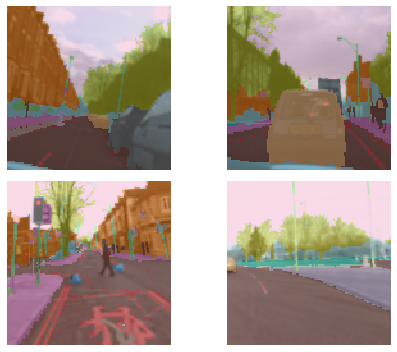

In [8]:
#Have a quick look at the data (optional)
data.show_batch(rows=2, figsize=(7,5))

In [9]:
learn = unet_learner(data, models.resnet18) #think of other arguments to pass, such as custom defined metrics

In [10]:
learn.fit_one_cycle(cyc_len=10, max_lr=1e-2) #what other argumenets should be passed in? how many epochs? what lr

epoch,train_loss,valid_loss,time
0,2.088100,1.571992,00:26
1,1.752648,1.589148,00:25
2,3.091747,2.075928,00:25
3,2.783243,1.640289,00:24
4,2.247081,1.284001,00:25
5,1.873203,1.119570,00:25
6,1.616819,1.091180,00:26
7,1.445449,1.037966,00:26
8,1.320129,1.008044,00:27
9,1.225122,1.007489,00:25


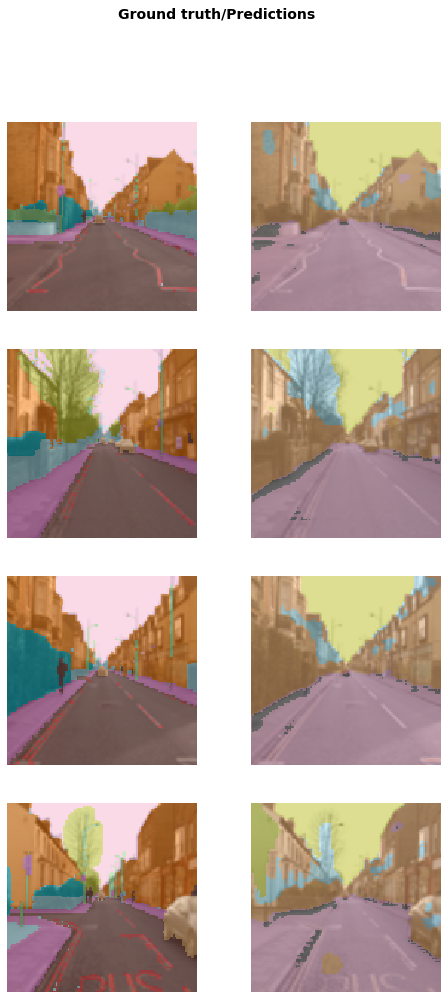

In [11]:
learn.show_results()

Here we switch to the seed data

In [ ]:
#path = Path('/home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train')
#path_img = path/'Images' #should later be provided through ini file
#path_lbl = path/'Labels' #should later be provided through ini file
#classes = range(4)

#def get_mask(img):
#    return (path_lbl)/img.name

In [ ]:
#src = (SegmentationItemList.from_folder(path)
#       .split_subsets(train_size=0.2, valid_size=0.1)
       #.split_by_rand_pct()
#       .label_from_func(get_mask, classes=list(classes)))

In [ ]:
#data = (src.transform(get_transforms(), tfm_y=True, size=128)
 #      .databunch(bs=8)
  #     .normalize())
#data